### Mutual Information - for continous variables

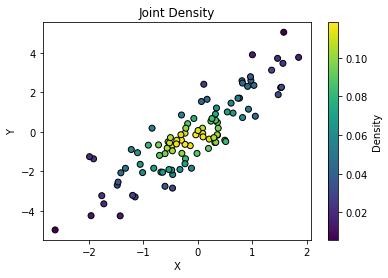

Mutual Information: -61.88986437336644


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate synthetic data
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=100)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=100)

# Estimate joint density
XY = np.column_stack((X, Y))
kde = KernelDensity(bandwidth=0.6).fit(XY)
joint_density = np.exp(kde.score_samples(XY))

# Estimate marginal densities
marginal_density_x = np.sum(joint_density[:, None], axis=0)  # Sum along axis 0
marginal_density_y = np.sum(joint_density[None, :], axis=1)  # Sum along axis 1

# Calculate mutual information
mutual_info = np.sum(joint_density * np.log2(joint_density / (marginal_density_x[None, :] * marginal_density_y[:, None])))

# Plot the joint density
plt.scatter(X, Y, c=joint_density, cmap='viridis', marker='o', edgecolor='black')
plt.title("Joint Density")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Density")
plt.show()

print("Mutual Information:", mutual_info)


### Mutual Information - for Discrete variables

In [2]:
import numpy as np
from collections import Counter

# Generate synthetic data
np.random.seed(42)
X = np.random.choice([0, 1], size=100)
Y = np.random.choice([1, 2, 3], size=100)

# Calculate joint probabilities
joint_counts = Counter(zip(X, Y))
total_observations = len(X)
joint_probabilities = {xy: count / total_observations for xy, count in joint_counts.items()}

# Calculate marginal probabilities
marginal_prob_x = {x: sum(joint_prob for (x_, y_), joint_prob in joint_probabilities.items() if x_ == x) for x in set(X)}
marginal_prob_y = {y: sum(joint_prob for (x_, y_), joint_prob in joint_probabilities.items() if y_ == y) for y in set(Y)}

# Calculate mutual information
mutual_info = sum(joint_prob * np.log2(joint_prob / (marginal_prob_x[x] * marginal_prob_y[y]))
                  for (x, y), joint_prob in joint_probabilities.items())

print("Joint Probabilities:")
print(joint_probabilities)
print("\nMarginal Probabilities (X):")
print(marginal_prob_x)
print("\nMarginal Probabilities (Y):")
print(marginal_prob_y)
print("\nMutual Information:", mutual_info)


Joint Probabilities:
{(0, 3): 0.17, (1, 2): 0.12, (0, 2): 0.14, (0, 1): 0.13, (1, 1): 0.22, (1, 3): 0.22}

Marginal Probabilities (X):
{0: 0.44000000000000006, 1: 0.5599999999999999}

Marginal Probabilities (Y):
{1: 0.35, 2: 0.26, 3: 0.39}

Mutual Information: 0.012218220964270346
